In [1]:
import pandas as pd
base = pd.read_csv('house_prices.csv')

In [2]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
base.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [4]:
base.shape

(21613, 21)

In [5]:
X = base.iloc[:, 5].values
X = X.reshape(-1,1)

In [6]:
X.shape

(21613, 1)

In [7]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [8]:
y = base.iloc[:, 2:3].values

In [9]:
y.shape

(21613, 1)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

/home/luizbag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/luizbag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [12]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

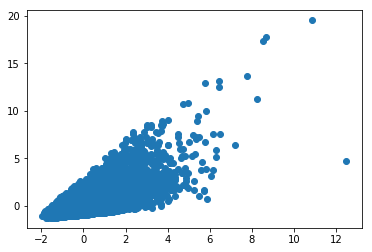

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [14]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [15]:
import tensorflow as tf

In [16]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [17]:
batch_size = 32
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [18]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        indices = np.random.randint(len(X), size = batch_size)
        feed = {xph: X[indices], yph: y[indices]}
        sess.run(treinamento, feed_dict = feed)
    b0_final, b1_final = sess.run([b0, b1])

In [20]:
b0_final

-0.0030732837

In [21]:
b1_final

0.69893813

In [22]:
previsoes = b0_final + b1_final * X

In [23]:
previsoes

array([[-0.68791734],
       [ 0.3699041 ],
       [-0.99993662],
       ...,
       [-0.80968096],
       [-0.36828784],
       [-0.80968096]])

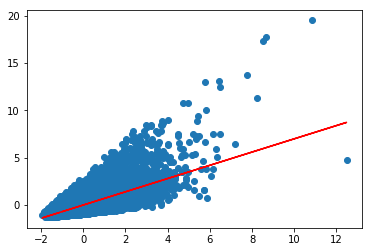

In [24]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color = 'red')

In [25]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [26]:
y1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [27]:
previsoes1

array([[287540.81921444],
       [675886.85706994],
       [172992.707329  ],
       ...,
       [242839.11701524],
       [404882.78748732],
       [242839.11701524]])

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1, previsoes1)
mae

173392.882080725